In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_validate

In [3]:
host = "localhost"
user = "root"
pw = ''
db = 'appartments'

# Loading data from database

In [4]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        # print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [5]:
connection = create_db_connection(host, user, pw, db)

q1 = """
SELECT *
FROM property;
"""

results = read_query(connection, q1)

from_db = []

for result in results:
    result = list(result)
    from_db.append(result)

columns = ['id', 'rooms', 'floor', 'floors_in_house', 'floor_relation', 
           'area', 'area_living', 'area_kitchen', 'price']
           
df = pd.DataFrame(from_db, columns=columns)

MySQL Database connection successful


In [6]:
df.head()

,id,rooms,floor,floors_in_house,floor_relation,area,area_living,area_kitchen,price
0,1,3,5,16,0.266667,105.0,75.0,14.0,7800
1,2,2,1,3,0.000000,48.0,33.0,8.0,2900
2,3,3,8,9,0.875000,65.0,42.0,9.0,4050
3,4,3,5,5,1.000000,54.9,43.0,6.0,3600
4,5,3,3,4,0.666667,83.0,55.0,9.0,5600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               494 non-null    int64  
 1   rooms            494 non-null    int64  
 2   floor            494 non-null    int64  
 3   floors_in_house  494 non-null    int64  
 4   floor_relation   494 non-null    float64
 5   area             494 non-null    float64
 6   area_living      494 non-null    float64
 7   area_kitchen     494 non-null    float64
 8   price            494 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 34.9 KB


In [8]:
df.describe()

,id,rooms,floor,floors_in_house,floor_relation,area,area_living,area_kitchen,price
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,247.500000,2.066802,3.647773,6.344130,0.504845,54.611134,30.468219,8.524636,3358.271255
std,142.749781,0.848332,2.512731,3.359313,0.371715,33.141904,16.384428,4.142467,1416.340490
min,1.000000,1.000000,1.000000,2.000000,0.000000,14.100000,0.000000,0.000000,470.000000
25%,124.250000,1.000000,2.000000,4.000000,0.175000,40.450000,18.000000,6.000000,2350.000000
50%,247.500000,2.000000,3.000000,5.000000,0.500000,49.950000,30.000000,8.000000,3150.000000
75%,370.750000,3.000000,5.000000,9.000000,0.875000,64.975000,41.000000,9.000000,4000.000000
max,494.000000,4.000000,14.000000,17.000000,1.000000,519.000000,110.000000,35.500000,10000.000000


# Correlation

<Axes: >

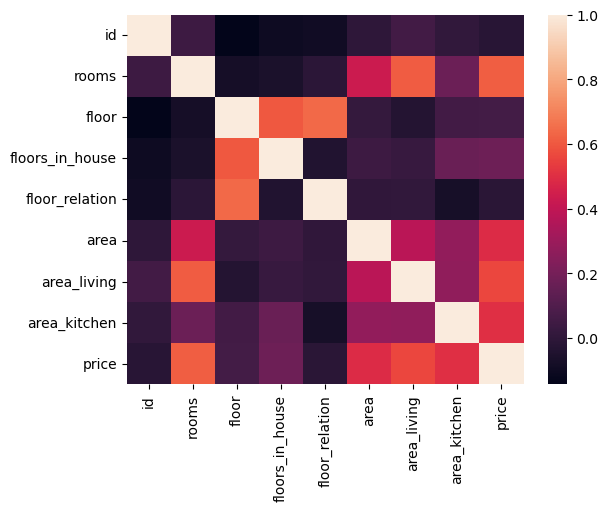

In [9]:
sns.heatmap(df.corr())

# Model

In [11]:
X = df[['rooms', 'floor', 'floors_in_house', 'floor_relation', 
        'area', 'area_living', 'area_kitchen']]
y = df['price']

# transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['rooms', 'floor', 'floors_in_house'])], remainder='passthrough')
# X = transformer.fit_transform(X)

model = LinearRegression()
model.fit(X, y)

scores = cross_validate(model, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error', 'max_error'))
scores

{'fit_time': array([0.00626159, 0.00497985, 0.00407147, 0.00431943, 0.00505328]),
 'score_time': array([0.00282598, 0.00379539, 0.00334144, 0.00452471, 0.00259018]),
 'test_r2': array([0.55910909, 0.57166353, 0.63071299, 0.62114417, 0.40390091]),
 'test_neg_mean_squared_error': array([-1026599.02908127,  -749589.82152109,  -647060.56816514,
         -880865.84541583, -1093858.92163735]),
 'test_max_error': array([-5185.94635776, -4474.93201854, -3541.22251267, -3201.98564738,
        -3738.34400081])}